In [1]:
#importing libraries

import numpy as np
import pandas as pd
from scipy import stats
from scipy.stats import norm, skew

#plots
import seaborn as sns
import matplotlib.pyplot as plt

#Models
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import lightgbm as lgb



# Misc
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA


# Ignore warnings
import warnings
warnings.filterwarnings(action="ignore")


C:\Users\pooji\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
#importing dataset

train = pd.read_csv("C:/Users/pooji/OneDrive/Desktop/Summer 2020 - MSBA/Machinelearning/house prediction/train.csv")
test = pd.read_csv("C:/Users/pooji/OneDrive/Desktop/Summer 2020 - MSBA/Machinelearning/house prediction/test.csv")

In [3]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
Id               1459 non-null int64
MSSubClass       1459 non-null int64
MSZoning         1455 non-null object
LotFrontage      1232 non-null float64
LotArea          1459 non-null int64
Street           1459 non-null object
Alley            107 non-null object
LotShape         1459 non-null object
LandContour      1459 non-null object
Utilities        1457 non-null object
LotConfig        1459 non-null object
LandSlope        1459 non-null object
Neighborhood     1459 non-null object
Condition1       1459 non-null object
Condition2       1459 non-null object
BldgType         1459 non-null object
HouseStyle       1459 non-null object
OverallQual      1459 non-null int64
OverallCond      1459 non-null int64
YearBuilt        1459 non-null int64
YearRemodAdd     1459 non-null int64
RoofStyle        1459 non-null object
RoofMatl         1459 non-null object
Exterior1st      1458 non-

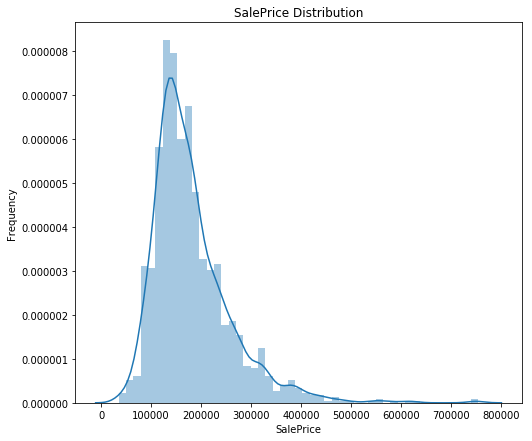

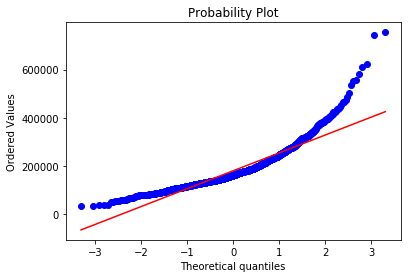

In [7]:
#distribution of target variable

f,ax = plt.subplots(figsize = (8,7))
sns.distplot(train["SalePrice"])
ax.set(ylabel = "Frequency")
ax.set(xlabel = "SalePrice")
ax.set(title = "SalePrice Distribution")
plt.show()

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)
plt.show()

In [8]:
#checking skewness and kurtosis

print("Skewness: " , train["SalePrice"].skew())
print("Kurtosis: " , train["SalePrice"].kurt())

Skewness:  1.8828757597682129
Kurtosis:  6.536281860064529


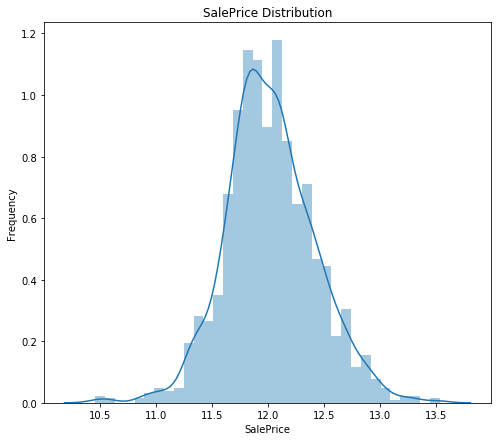

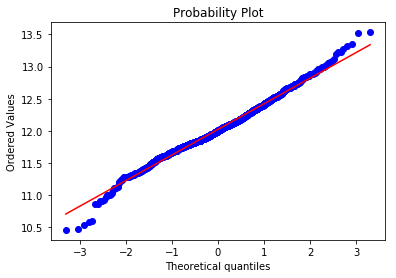

In [9]:
#applying log transformation on target variable

train["SalePrice"] = np.log1p(train["SalePrice"])

#distribution of target variable

f,ax = plt.subplots(figsize = (8,7))
sns.distplot(train["SalePrice"])
ax.set(ylabel = "Frequency")
ax.set(xlabel = "SalePrice")
ax.set(title = "SalePrice Distribution")
plt.show()

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)
plt.show()

In [10]:
test_ID = test["Id"]

In [11]:
ntrain = train.shape[0]
ntest = test.shape[0]
y_train = train.SalePrice.values
data = pd.concat((train,test))
data.drop(["Id","SalePrice"],axis =1,inplace = True)
data.shape

(2919, 79)

In [12]:
missing = (data.isnull().sum()/(data.shape[0]))*100
missing_values = missing.drop(missing[missing == 0].index)
missing_values.sort_values(ascending = False)

PoolQC          99.657417
MiscFeature     96.402878
Alley           93.216855
Fence           80.438506
FireplaceQu     48.646797
LotFrontage     16.649538
GarageQual       5.447071
GarageCond       5.447071
GarageFinish     5.447071
GarageYrBlt      5.447071
GarageType       5.378554
BsmtExposure     2.809181
BsmtCond         2.809181
BsmtQual         2.774923
BsmtFinType2     2.740665
BsmtFinType1     2.706406
MasVnrType       0.822199
MasVnrArea       0.787941
MSZoning         0.137033
BsmtFullBath     0.068517
BsmtHalfBath     0.068517
Utilities        0.068517
Functional       0.068517
Electrical       0.034258
BsmtUnfSF        0.034258
Exterior1st      0.034258
Exterior2nd      0.034258
TotalBsmtSF      0.034258
GarageArea       0.034258
GarageCars       0.034258
BsmtFinSF2       0.034258
BsmtFinSF1       0.034258
KitchenQual      0.034258
SaleType         0.034258
dtype: float64

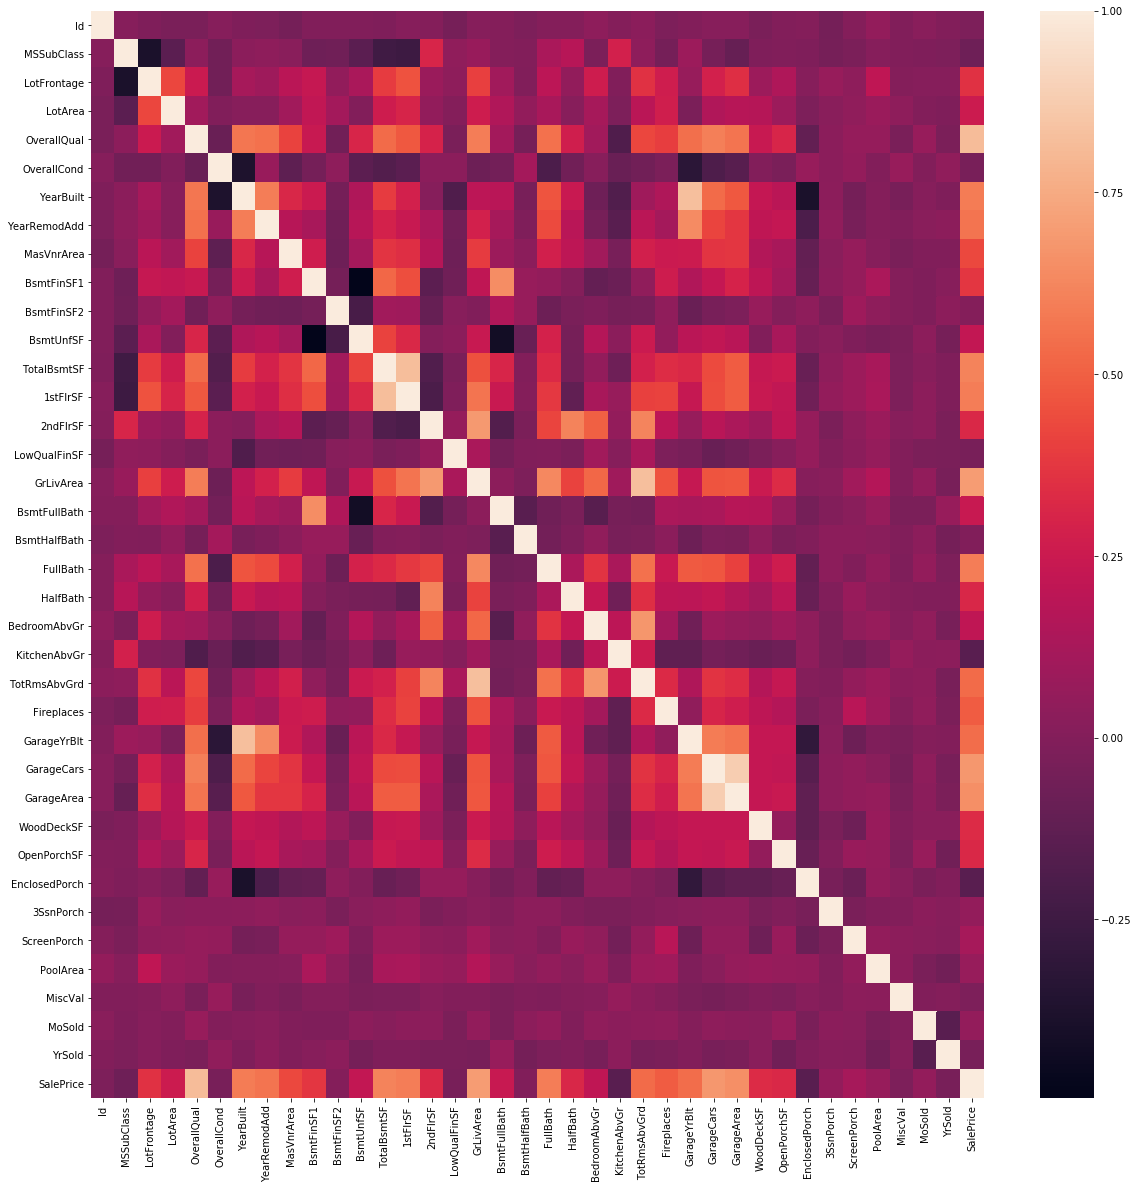

In [13]:
plt.figure(figsize = (20,20))
sns.heatmap(data = train.corr(),annot = False)

In [14]:
corr = train.corr()
corr[corr["SalePrice"]>0.7].index

Index(['OverallQual', 'GrLivArea', 'SalePrice'], dtype='object')

In [15]:
#missing values for major features
missing_list = ["PoolQC","MiscFeature","Alley","Fence","FireplaceQu","LotFrontage"]
for i in missing_list:
    print("\nThe distribution of data:\n", data[i].value_counts())


The distribution of data:
 Ex    4
Gd    4
Fa    2
Name: PoolQC, dtype: int64

The distribution of data:
 Shed    95
Gar2     5
Othr     4
TenC     1
Name: MiscFeature, dtype: int64

The distribution of data:
 Grvl    120
Pave     78
Name: Alley, dtype: int64

The distribution of data:
 MnPrv    329
GdPrv    118
GdWo     112
MnWw      12
Name: Fence, dtype: int64

The distribution of data:
 Gd    744
TA    592
Fa     74
Po     46
Ex     43
Name: FireplaceQu, dtype: int64

The distribution of data:
 60.0     276
80.0     137
70.0     133
50.0     117
75.0     105
65.0      93
85.0      76
21.0      50
24.0      49
63.0      47
78.0      46
90.0      46
68.0      44
64.0      43
74.0      39
72.0      39
73.0      33
62.0      31
52.0      28
100.0     28
82.0      28
79.0      28
51.0      27
59.0      27
57.0      26
66.0      26
76.0      25
53.0      24
55.0      24
43.0      23
        ... 
140.0      2
122.0      2
116.0      2
149.0      2
150.0      2
174.0      2
25.0       1
1

PoolQC,MiscFeature,Alley,Fence,FireplaceQu,GarageFinish,GarageYrBlt,SaleType : fill with None
LotFrontage,MasVnrArea,BsmtUnfSF,TotalBsmtSF,GarageArea,BsmtFinSF2,BsmtFinSF1 : fill with median
GarageQual,GarageCond,GarageType,BsmtExposure,BsmtCond,BsmtQual,BsmtFinType2,
BsmtFinType1,MasVnrType,MSZoning,BsmtFullBath,BsmtHalfBath,Utilities,Functional,
Electrical,Exterior1st,Exterior2nd,GarageCars,KitchenQual  : fill with mode

In [16]:
#filling missing values

None_list = ["PoolQC","MiscFeature","Alley","Fence","FireplaceQu","GarageFinish","GarageYrBlt","SaleType"]
for i in list(None_list):
    data[i] = data[i].fillna("None")

Median_list = ["LotFrontage","MasVnrArea","BsmtUnfSF","TotalBsmtSF","GarageArea","BsmtFinSF2","BsmtFinSF1"]
for i in list(Median_list):
    data[i] = data[i].fillna(data[i].median())
    
Mode_list = ["GarageQual","GarageCond","GarageType","BsmtExposure","BsmtCond","BsmtQual","BsmtFinType2","BsmtFinType1","MasVnrType","MSZoning","BsmtFullBath","BsmtHalfBath","Utilities","Functional","Electrical","Exterior1st","Exterior2nd","GarageCars","KitchenQual"]
for i in list(Mode_list):
    data[i] = data[i].fillna(data[i].mode()[0])

In [17]:
#check the missing values again

missing = (data.isnull().sum()/(data.shape[0]))*100
missing_values = missing.drop(missing[missing == 0].index)
missing_values.sort_values(ascending = False)


Series([], dtype: float64)

There are no more missing values

In [18]:
#encoding categorical data
from sklearn.preprocessing import LabelEncoder
for col in data.columns:
    if data[col].dtype == "object":
        le = LabelEncoder()
        data[col] = le.fit_transform(list(data[col].astype(str).values))
        
data.shape

(2919, 79)

In [19]:
train = data[:ntrain]
test = data[ntrain:]

In [20]:
#Building models

n_folds = 5

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(train.values)
    rmse= np.sqrt(-cross_val_score(model, train.values, y_train, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

#Lasso regression
lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=1))

#Elastic Net regression
ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))

#Kernel Ridge regression
KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)

#Gradient Boosting Regression 
GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,max_depth=4, max_features='sqrt',min_samples_leaf=15, min_samples_split=10,loss='huber', random_state =5)

#XGBoost
model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, 
                             random_state =7, nthread = -1)

#LightGBM
model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)


In [21]:
score = rmsle_cv(lasso)
print("\nLasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
score = rmsle_cv(ENet)
print("ElasticNet score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
score = rmsle_cv(KRR)
print("Kernel Ridge score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
score = rmsle_cv(GBoost)
print("Gradient Boosting score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
score = rmsle_cv(model_xgb)
print("Xgboost score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
score = rmsle_cv(model_lgb)
print("LGBM score: {:.4f} ({:.4f})\n" .format(score.mean(), score.std()))



Lasso score: 0.1498 (0.0270)

ElasticNet score: 0.1498 (0.0269)

Kernel Ridge score: 2.5553 (1.9226)

Gradient Boosting score: 0.1246 (0.0128)

Xgboost score: 0.1237 (0.0103)

LGBM score: 0.1259 (0.0103)



In [22]:
#predicted values
def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

In [23]:
#XGbOOST

model_xgb.fit(train, y_train)
xgb_train_pred = model_xgb.predict(train)
xgb_pred = np.expm1(model_xgb.predict(test))
print("RMSE for XGBoost:",rmsle(y_train, xgb_train_pred))

#LightGBM
model_lgb.fit(train, y_train)
lgb_train_pred = model_lgb.predict(train)
lgb_pred = np.expm1(model_lgb.predict(test.values))
print("RMSE for LightGBM:",rmsle(y_train, lgb_train_pred))

#GradientBoost
GBoost.fit(train, y_train)
GBoost_train_pred = GBoost.predict(train)
GBoost_pred = np.expm1(GBoost.predict(test.values))
print("RMSE for GBoost:",rmsle(y_train, GBoost_train_pred))

RMSE for XGBoost: 0.07968252367639783
RMSE for LightGBM: 0.0765304376922519
RMSE for GBoost: 0.05091979725032852


In [24]:
final = pd.DataFrame()
final['Id'] = test_ID
final['SalePrice'] = GBoost_pred
final.to_csv('submission.csv',index=False)